In [7]:
from urllib.parse import parse_qs, urlencode, urlparse

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from tqdm import tqdm

from results import RC_YEARS, REGATTA_IDS, RC_RESULTS_PAGE, RC_RESULTS_JSON, RC_RESULTS_PARAMS, fetch_results
from analysis import Time, get_top_fraction

In [2]:
# These must be exactly as they appear on RegattaCentral
events = [
    "Men's Club Eights",
    "Men's Master Eights [40+]",
    "Men's Club Fours",
    "Men's Master Fours [40+]",
    "Women's Club Eights",
    "Women's Master Eights [40+]",
    "Women's Club Fours",
    "Women's Master Fours [40+]",
]
results = pd.concat(
    (
        pd.DataFrame(fetch_results(year, event))
        .assign(year=year, eventName=event)
        .dropna(axis="columns", how="all")
        .set_index(["eventName", "year", "finishPlace"])
    )
    for event in events
    for year in tqdm(RC_YEARS, desc=f"Fetching results for {event}", unit="year")
)
results.to_csv("hocr_results.csv")
results = pd.read_csv("hocr_results.csv", index_col=["eventName", "year", "finishPlace"])
results

Fetching results for Women's Master Fours [40+]: 100%|████████████████████████████████| 11/11 [00:02<00:00,  3.83year/s]


adjustedTime  lane  \
eventName                  year finishPlace                       
Men's Club Eights          2012 1                  881266     1   
                                2                  898075     6   
                                3                  900860     2   
                                4                  915873     5   
                                5                  916166     7   
...                                                   ...   ...   
Women's Master Fours [40+] 2023 17                1238064    10   
                                18                1249797     3   
                                19                1250505     8   
                                20                1290435    14   
                                21                1323399    15   

                                                         screenFile seed  \
eventName                  year finishPlace                                
Men's Club Eights          2012 1             153_1267070876970.png    A   
                                2             177_1211370586294.png    A   
                                3              63_1211511763522.png    A   
                                4              78_1211367876374.png    A   
                                5            2316_1495480215716.png    A   
...                                                             ...  ...   
Women's Master Fours [40+] 2023 17           2065_1232496297243.png    A   
                                18            266_1211574324819.png    A   
                                19            235_1211427581556.png    A   
                                20           4824_1348393760026.png    A   
                                21           2824_1253840758817.png    A   

                                                   boatLabel  \
eventName                  year finishPlace                    
Men's Club Eights          2012 1                 M. Douglas   
                                2            P. Mastroyannis   
                                3                   R. Meder   
                                4               V. RAGOUSSIS   
                                5                   J. Stein   
...                                                      ...   
Women's Master Fours [40+] 2023 17                 Stutz, K.   
                                18               Tamariz, L.   
                                19                Hoover, M.   
                                20               Hoffman, M.   
                                21                Parker, D.   

                                            adjustedTimeString  boatId  \
eventName                  year finishPlace                              
Men's Club Eights          2012 1                    14:41.266    2836   
                                2                    14:58.075    4754   
                                3                    15:00.860    6250   
                                4                    15:15.873    5736   
                                5                    15:16.166    4904   
...                                                        ...     ...   
Women's Master Fours [40+] 2023 17                   20:38.064    4460   
                                18                   20:49.797    4915   
                                19                   20:50.505    3049   
                                20                   21:30.435    4415   
                                21                   22:03.399    5042   

                                             handicap  penalty  \
eventName                  year finishPlace                      
Men's Club Eights          2012 1                   0        0   
                                2                   0        0   
                                3                   0        0   
                                4                   0     

In [3]:
def get_event_year_results(results, event, year):
    return results[
        (results.index.get_level_values("eventName") == event)
        & (results.index.get_level_values("year") == year)
    ]

get_event_year_results(results, "Men's Club Eights", 2023)

adjustedTime  lane  \
eventName         year finishPlace                       
Men's Club Eights 2023 1                  853412     2   
                       2                  857808     5   
                       3                  869106     8   
                       4                  871495     6   
                       5                  872573     3   
                       6                  872828    10   
                       7                  873306     7   
                       8                  881792     9   
                       9                  893896     4   
                       10                 895986    35   
                       11                 897933    15   
                       12                 904332    13   
                       13                 906892    17   
                       14                 906898    23   
                       15                 906966    25   
                       16                 908186    19   
                       17                 909405    11   
                       18                 909963    12   
                       19                 933757    26   
                       20                 933831    16   
                       21                 935784    14   
                       22                 937182    34   
                       23                 938211    18   
                       24                 943471    36   
                       25                 948822    20   
                       26                 954604    32   
                       27                 988343    21   
                       28                 996289    29   
                       29                1007992    33   
                       30                1010072    28   
                       31                1028992    22   
                       32                1035327    30   
                       33                1109453    31   
                       34                1170900    27   
                       35                1207508    24   
                       999                856722     1   

                                                 screenFile seed  \
eventName         year finishPlace                                 
Men's Club Eights 2023 1              153_1267070876970.png    A   
                       2               59_1211513070024.png    A   
                       3             1986_1477544154948.png    A   
                       4               78_1211367876374.png    A   
                       5              279_1211427642464.png    A   
                       6             2316_1495480215716.png    A   
                       7              153_1267070876970.png    B   
                       8               78_1211367876374.png    B   
                       9              172_1211369665746.png    B   
                       10            1356_1211514137421.png    A   
                       11             258_1400093423987.png    A   
                       12             279_1211427642464.png    B   
                       13            1929_1579066811157.png    A   
                       14            2316_1495480215716.png    B   
                       15              51_1211369388923.png    A   
                       16             183_1376890493176.png    A   
                       17             722_1211574109030.png    A   
                       18            1071_1620681305716.png    A   
                       19              61_1211368709930.png    A   
                       20             200_1211368660166.png    A   
                       21            3388_1280547627564.png    A   
                       22             279_1211427642464.png    C   
                       23             722_1211574109030.png    B   
                       24            8653_1404071697654.png    A   
                       25              36_1211513061426.png    

In [4]:
def get_winner_aq_mitrc_times(results, event):
    event_results = [
        get_event_year_results(results, event, year) for year in RC_YEARS
    ]
    winner_times = [
        get_top_fraction(res["adjustedTime"].array / 1000, 0) for res in event_results
    ]
    aq_times = [
        get_top_fraction(res["adjustedTime"].array / 1000, 0.5) for res in event_results
    ]
    # Need to check if MITRC has times each year
    mitrc_results = [
        res[res["orgName"] == "MITRC"] for res in event_results
    ]
    mitrc_times = [
        res["adjustedTime"].item() / 1000 if not res.empty else np.nan for res in mitrc_results
    ]
    return np.array(winner_times), np.array(aq_times), np.array(mitrc_times)

get_winner_aq_mitrc_times(results, "Men's Club Eights")

(array([881.266, 866.767, 875.768, 904.95 , 898.331, 872.582, 886.851,
        876.116, 866.072, 860.881, 853.412]),
 array([ 978.638,  959.628,  954.114,  974.138, 1005.008,  943.338,
         957.307,  945.418,  944.222,  950.406,  909.963]),
 array([1017.603,      nan, 1001.584,  979.676, 1047.001, 1021.217,
             nan, 1030.439, 1109.293,  971.701, 1028.992]))

In [5]:
def get_mitrc_avg_ages(results, event):
    event_results = [
        get_event_year_results(results, event, year) for year in RC_YEARS
    ]
    mitrc_results = [
        res[res["orgName"] == "MITRC"] for res in event_results
    ]
    mitrc_ages = [
        res["avgAge"].item() if not res.empty else np.nan for res in mitrc_results
    ]
    return np.array(mitrc_ages)

get_mitrc_avg_ages(results, "Men's Club Eights")

array([27., nan, 29., 26., 29., 29., nan, 27., 31., 25., 34.])

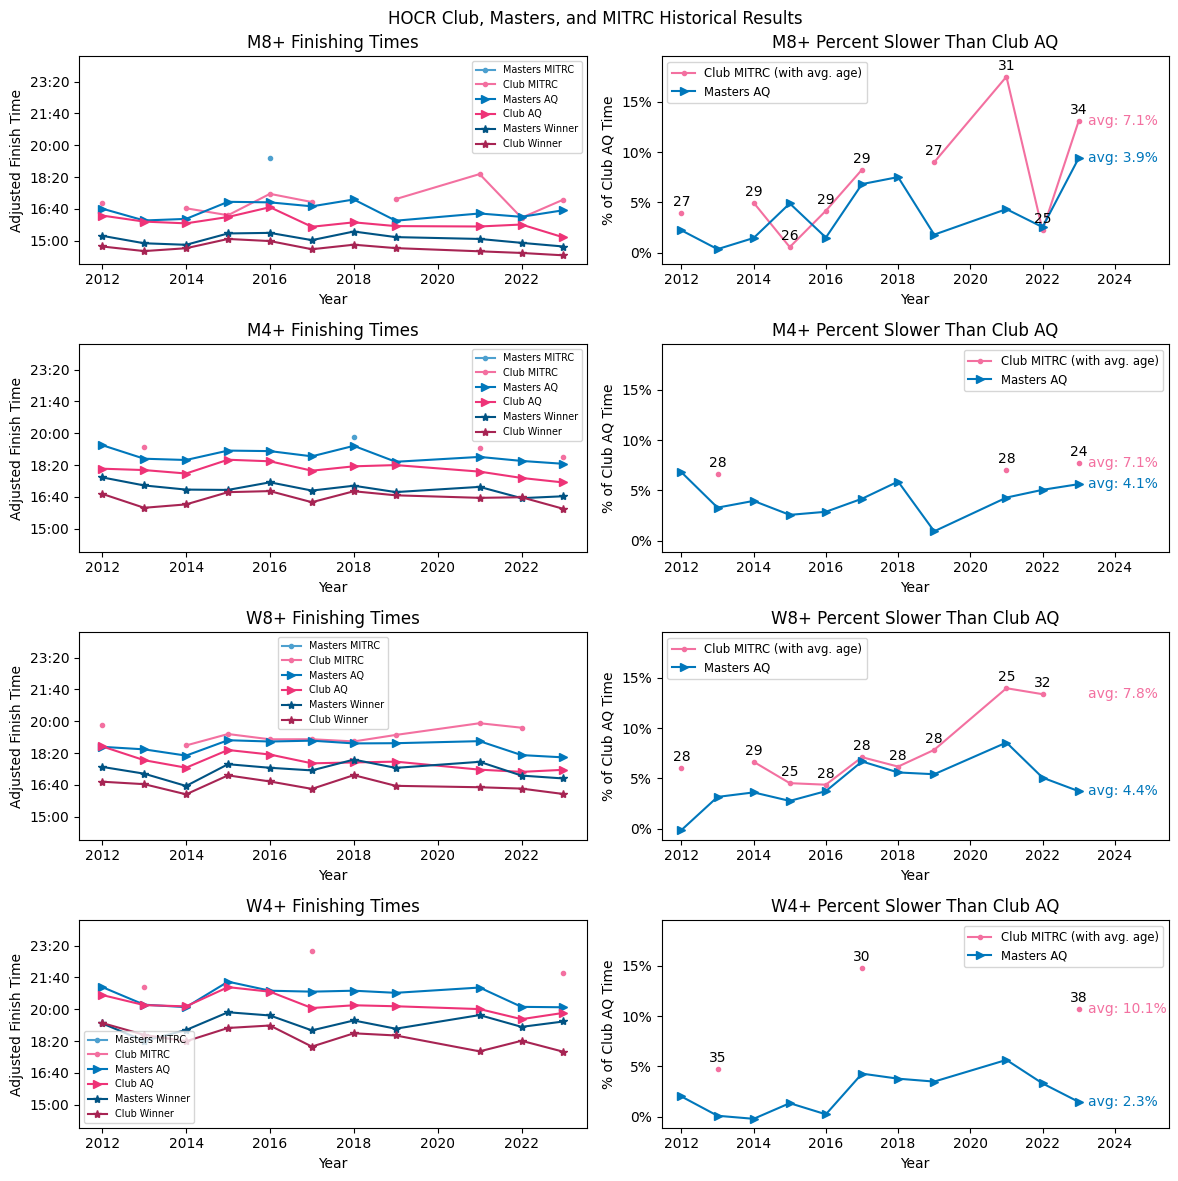

In [24]:
def parse_boat_class(boat_class: str):
    if boat_class.upper().startswith("M"):
        gender = "Men's"
    elif boat_class.upper().startswith("W"):
        gender = "Women's"
    else:
        gender = ""
    if "8" in boat_class:
        boats = "Eights"
    elif "4" in boat_class:
        boats = "Fours"
    else:
        boats = ""
    return gender, boats

def plot_comparison(results, boat_class, t_ax, d_ax):
    gender, boats = parse_boat_class(boat_class)
    club_event = f"{gender} Club {boats}"
    masters_event = f"{gender} Master {boats} [40+]"
    c_winner_times, c_aq_times, c_mitrc_times = get_winner_aq_mitrc_times(results, club_event)
    m_winner_times, m_aq_times, m_mitrc_times = get_winner_aq_mitrc_times(results, masters_event)

    t_ax.plot(RC_YEARS, m_mitrc_times, label="Masters MITRC", marker=".", color="#4da0cf")
    t_ax.plot(RC_YEARS, c_mitrc_times, label="Club MITRC", marker=".", color="#f370a0")
    t_ax.plot(RC_YEARS, m_aq_times, label="Masters AQ", marker=">", color="#0077bb")
    t_ax.plot(RC_YEARS, c_aq_times, label="Club AQ", marker=">", color="#ee3377")
    t_ax.plot(RC_YEARS, m_winner_times, label="Masters Winner", marker="*", color="#005383")
    t_ax.plot(RC_YEARS, c_winner_times, label="Club Winner", marker="*", color="#a72453")
    t_ax.set(xlabel="Year", ylabel="Adjusted Finish Time", title=f"{boat_class} Finishing Times")
    t_ax.yaxis.set_major_formatter(
        lambda val, pos: f"{Time(val).mins}:{int(Time(val).secs):02d}"
    )
    t_ax.legend(prop={"size": "x-small"})

    mitrc_percent_diff_to_club_aq = ((c_mitrc_times - c_aq_times) / c_aq_times) * 100
    mitrc_ages = get_mitrc_avg_ages(results, club_event)
    m_aq_percent_diff_to_club_aq = ((m_aq_times - c_aq_times) / c_aq_times) * 100
    d_ax.plot(RC_YEARS, mitrc_percent_diff_to_club_aq, label="Club MITRC (with avg. age)", marker=".", color="#f370a0")
    d_ax.plot(RC_YEARS, m_aq_percent_diff_to_club_aq, label="Masters AQ", marker=">", color="#0077bb")
    for year, y, age in zip(RC_YEARS, mitrc_percent_diff_to_club_aq, mitrc_ages):
        d_ax.annotate(f"{age:g}", (year, y), xytext=(0,0.5), textcoords="offset fontsize", horizontalalignment="center")
    d_ax.annotate(
        f"avg: {np.nanmean(mitrc_percent_diff_to_club_aq):.1f}%",
        (2023.25, mitrc_percent_diff_to_club_aq[~np.isnan(mitrc_percent_diff_to_club_aq)][-1]),
        verticalalignment="center",
        # horizontalalignment="right",
        color="#f370a0",
    )
    d_ax.annotate(
        f"avg: {np.nanmean(m_aq_percent_diff_to_club_aq):.1f}%",
        (2023.25, m_aq_percent_diff_to_club_aq[-1]),
        verticalalignment="center",
        # horizontalalignment="right",
        color="#0077bb",
    )
    d_ax.set_xlim(right=2025.5)
    d_ax.set(xlabel="Year", ylabel="% of Club AQ Time", title=f"{boat_class} Percent Slower Than Club AQ")
    d_ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    d_ax.legend(prop={"size": "small"})

fig, (
    (m8t_ax, m8d_ax),
    (m4t_ax, m4d_ax),
    (w8t_ax, w8d_ax),
    (w4t_ax, w4d_ax),
) = plt.subplots(4, 2, figsize=(12.0, 12.0), sharey="col")

plot_comparison(results, "M8+", m8t_ax, m8d_ax)
plot_comparison(results, "M4+", m4t_ax, m4d_ax)
plot_comparison(results, "W8+", w8t_ax, w8d_ax)
plot_comparison(results, "W4+", w4t_ax, w4d_ax)
# Customizations
m8t_ax.set_ylim(top=Time("24:40"))  # y-axis shared by all t_ax
m8d_ax.set_ylim(top=19.5)  # y-axis shared by all d_ax
w4t_ax.legend(loc="lower left", prop={"size": "x-small"})

fig.suptitle("HOCR Club, Masters, and MITRC Historical Results")
fig.tight_layout()
fig.savefig("HOCR Historical Comparison.pdf")